# Hyperbranched example

## Validated change of neighbour particle types


In [40]:
import h5py
import numpy as np
import seaborn as sns
sns.set_style('white')
sns.set_palette('Set1')

In [2]:
h5 = h5py.File('sim_12345_traj.h5', 'r')

In [3]:
t0 = [x for x in h5['/particles/atoms/species/value'][0] if x != -1]
t1 = [x for x in h5['/particles/atoms/species/value'][1] if x != -1]

In [4]:
tn = ['M1', 'M2', 'MA', 'MB', 'P1', 'P2', 'PA', 'PB', 'RA', 'RB']

In [5]:
vtn = {'M1': 'P1', 'M2': 'P2', 'MA': 'PA', 'MB': 'PB', 'MB': 'RB', 'MA': 'RA', 'PB': 'RB', 'PA': 'RA'}

In [6]:
import networkx as nx

In [8]:
b_static = h5['/connectivity/bonds']
cl = h5['/connectivity/chem_bonds_0/value']

In [106]:
cg_beads = {
    x: range(x*6+1, x*6+6+1)
    for x in range(1000)
}
at_cg_bead = {
    a: k for k, v in cg_beads.items() for a in v
}

at_types = h5['/particles/atoms/species/value'][-1]
at_types0 = h5['/particles/atoms/species/value'][0]
connected_cg = set()
for b1, b2 in cl[-1][:6]:
    if b1 != -1 and b2 != -1:
        cg1, cg2 = map(at_cg_bead.get, (b1, b2))
        connected_cg.add(tuple(sorted((cg1, cg2))))
        t1 = tn[at_types[b1-1]]
        t2 = tn[at_types[b2-1]]
        t01 = tn[at_types0[b1-1]]
        t02 = tn[at_types0[b2-1]]
        print t01, t1, t02, t2

ac_nodes = set()
ac_nodes.update(range(1, 13))
print 'Before reaction, After reaction'
for cg1, cg2 in connected_cg:
    t1 = [tn[at_types[i-1]] for i in cg_beads[cg1]]
    t01 = [tn[at_types0[i-1]] for i in cg_beads[cg1]]
    t2 = [tn[at_types[i-1]] for i in cg_beads[cg2]]
    t02 = [tn[at_types0[i-1]] for i in cg_beads[cg2]]
    ac_nodes.update(cg_beads[cg1])
    ac_nodes.update(cg_beads[cg2])
    print t01, t1
    print t02, t2
    print '-'*10

MA RA MB RB
MA RA MB RB
MA RA MB RB
MA RA MB RB
MA RA MB RB
MA RA MB RB
Before reaction, After reaction
['MA', 'M1', 'M2', 'M2', 'MB', 'MB'] ['RA', 'P1', 'P2', 'P2', 'PB', 'PB']
['MA', 'M1', 'M2', 'M2', 'MB', 'MB'] ['PA', 'P1', 'P2', 'P2', 'RB', 'PB']
----------
['MA', 'M1', 'M2', 'M2', 'MB', 'MB'] ['RA', 'P1', 'P2', 'P2', 'PB', 'PB']
['MA', 'M1', 'M2', 'M2', 'MB', 'MB'] ['PA', 'P1', 'P2', 'P2', 'PB', 'RB']
----------
['MA', 'M1', 'M2', 'M2', 'MB', 'MB'] ['PA', 'P1', 'P2', 'P2', 'PB', 'RB']
['MA', 'M1', 'M2', 'M2', 'MB', 'MB'] ['RA', 'P1', 'P2', 'P2', 'PB', 'PB']
----------
['MA', 'M1', 'M2', 'M2', 'MB', 'MB'] ['PA', 'P1', 'P2', 'P2', 'PB', 'RB']
['MA', 'M1', 'M2', 'M2', 'MB', 'MB'] ['RA', 'P1', 'P2', 'P2', 'PB', 'PB']
----------
['MA', 'M1', 'M2', 'M2', 'MB', 'MB'] ['RA', 'P1', 'P2', 'P2', 'PB', 'PB']
['MA', 'M1', 'M2', 'M2', 'MB', 'MB'] ['PA', 'P1', 'P2', 'P2', 'RB', 'PB']
----------
['MA', 'M1', 'M2', 'M2', 'MB', 'MB'] ['RA', 'P1', 'P2', 'P2', 'PB', 'PB']
['MA', 'M1', 'M2', 'M2', 'M

In [10]:
g0 = nx.Graph()
node_labels = {i+1: x for i, x in enumerate(h5['/particles/atoms/species/value'][-1]) if x != -1 and i+1 in ac_nodes}
for b1, b2 in b_static:
    if b1 != -1 and b2 != -1 and b1 in ac_nodes and b2 in ac_nodes:
        g0.add_edge(b1, b2)

In [11]:
g0.add_nodes_from(ac_nodes)

In [12]:
node_colors = ['r' if node_labels[i] < 4 else 'b' for i in g0.nodes()]

In [13]:
for b1, b2 in cl[-1][:6]:
    if b1 != -1 and b2 != -1 and b1 in ac_nodes and b2 in ac_nodes:
        g0.add_edge(b1, b2)

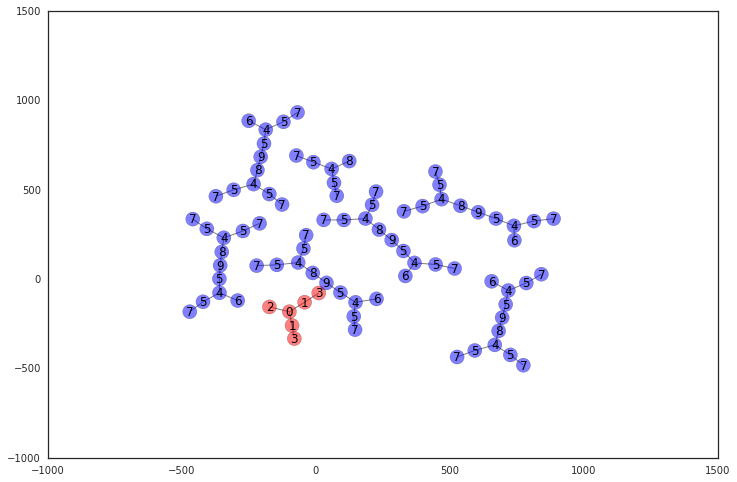

In [87]:
from networkx.drawing.nx_agraph import graphviz_layout
pos = graphviz_layout(g0)
plt.rcParams['figure.figsize'] = (12, 8)
nx.draw_networkx(g0, pos, node_color=node_colors, labels=node_labels, alpha=0.5, node_size=200)

In [15]:
cg_connections = set()
cg_activated = set()
for b1, b2 in cl[-1]:
    if b1 != -1 and b2 != -1:
        cg1, cg2 = map(at_cg_bead.get, (b1, b2))
        cg_connections.add(tuple(sorted((cg1, cg2))))
        cg_activated.add(cg1)
        cg_activated.add(cg2)
g1 = nx.Graph()

In [16]:
g1.add_nodes_from(cg_activated)
g1.add_edges_from(cg_connections)

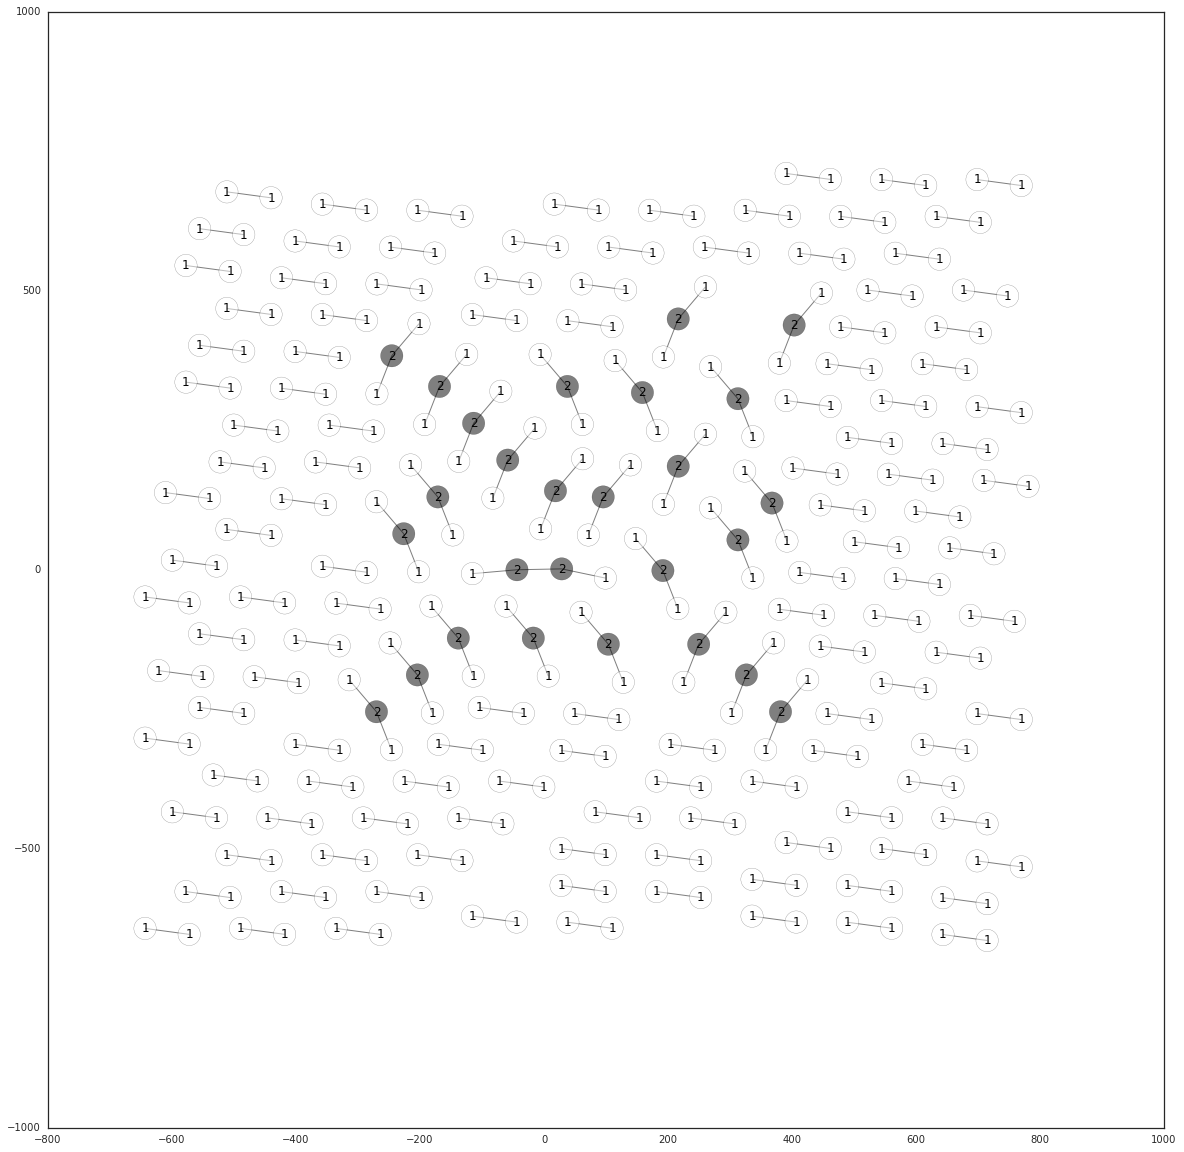

In [101]:
from networkx.drawing.nx_agraph import graphviz_layout
pos = graphviz_layout(g1)
plt.rcParams['figure.figsize'] = (20, 20)
g1_degree = g1.degree()
nx.draw_networkx(g1, pos, alpha=0.5, node_size=500, labels=g1_degree, node_color=[g1_degree[x] for x in g1.nodes()])

# Check exclude list

In [18]:
import cPickle
exl = cPickle.load(open('exclude_list.pck', 'rb'))

In [20]:
exl_set = {tuple(sorted(x)) for x in exl[0]}
b_set = {tuple(sorted(x)) for x in cl[-1] if x[0] != -1 and x[1] != -1}
b_set.update({tuple(sorted(x)) for x in b_static})

In [103]:
print "bond_set - exclude_set:", (b_set - exl_set)

bond_set - exclude_set: set([(-1, -1)])


# Potentials

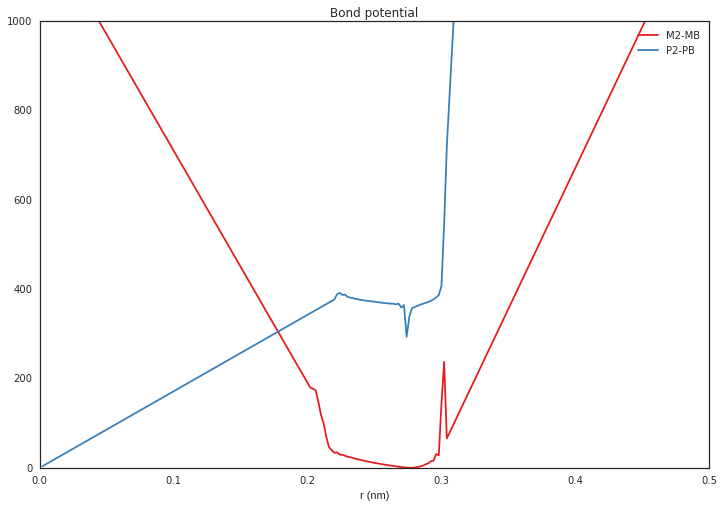

In [81]:
b1 = np.loadtxt('table_b2.pot')
b5 = np.loadtxt('table_b6.pot')
plt.rcParams['figure.figsize'] = (12, 8)
plt.plot(b1[:, 0], b1[:, 1], label='M2-MB')
plt.plot(b5[:, 0], b5[:, 1], label='P2-PB')
plt.legend()
plt.title('Bond potential')
plt.ylim([0, 1000])
plt.xlabel('r (nm)')

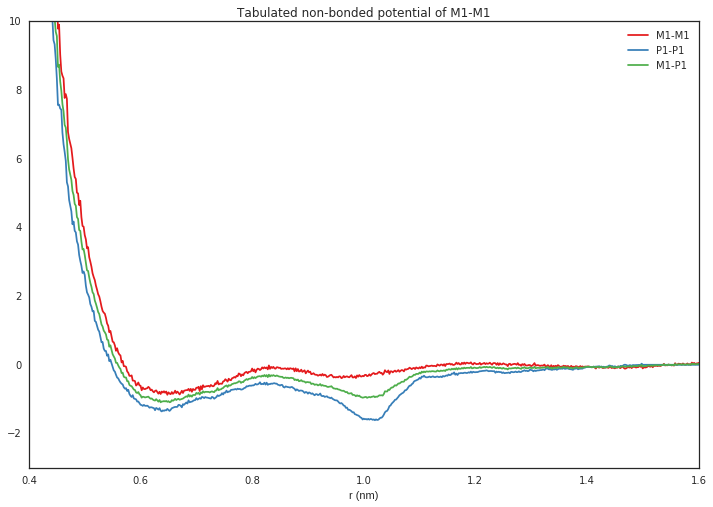

In [77]:
b1 = np.loadtxt('table_M1_M1.pot')
b5 = np.loadtxt('table_P1_P1.pot')
plt.rcParams['figure.figsize'] = (12, 8)
xra, xrb = 200, 800
plt.plot(b1[xra:xrb, 0], b1[xra:xrb, 1], label='M1-M1')
plt.plot(b5[xra:xrb, 0], b5[xra:xrb, 1], label='P1-P1')
plt.plot(b5[xra:xrb, 0], 0.5*b1[xra:xrb, 1] + 0.5*b5[xra:xrb, 1], label='M1-P1')
plt.ylim([-3, 10])
plt.xlabel('r (nm)')
plt.legend()
plt.title('Tabulated non-bonded potential of M1-M1')

# Questions

What are the structures **T**, **1t**, **2t** and other?

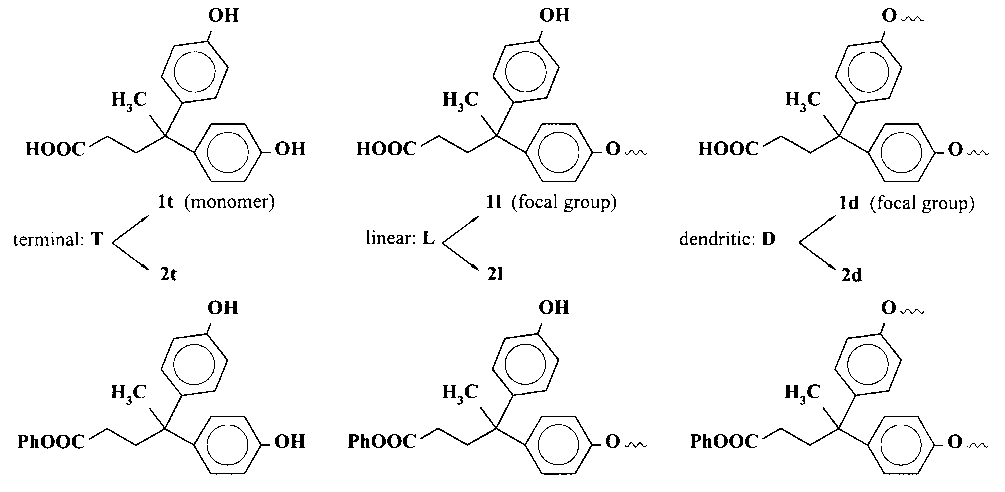

In [88]:
from IPython.display import Image
Image(filename='/home/teodor/Desktop/struct.png') 